In [1]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(fname="imdb.tar.gz",
                                origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                extract=True)

84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
data_set

'/root/.keras/datasets/imdb.tar.gz'

In [4]:
def directory_data(directory):
  data = {}
  data['review'] = []

  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), 'r', encoding='utf-8') as file:
      data['review'].append(file.read())

  return pd.DataFrame.from_dict(data)

In [5]:
def data(directory):
  pos_df = directory_data(os.path.join(directory, 'pos'))
  neg_df = directory_data(os.path.join(directory, 'neg'))
  pos_df['sentiment'] = 1
  neg_df['sentiment'] = 0

  return pd.concat([pos_df, neg_df])

In [6]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))
train_df.head()

,review,sentiment
0,Claire Denis's Chocolat is a beautiful but fru...,1
1,"""Thieves and Liars"" presents us with a very na...",1
2,"Jess is 18, very smart and wants nothing more ...",1
3,The film is exceptional in it's gay iconograph...,1
4,I spotted this movie in the video store a few ...,1


In [7]:
reviews = list(train_df['review'])
print(reviews[0])
print(reviews[1])

Claire Denis's Chocolat is a beautiful but frustrating film. The film presents a very interesting look at the household of a European colonial family living in Cameroon, giving the viewer an informative perspective on the lives of many characters and their interaction. However, the development of these characters is often maddeningly insufficient. For example, a central theme in the story is young France's inability to form strong relationships with others. Although this portrayal is executed flawlessly, notably in the way that Denis frames the story with scenes from France's return to her childhood home, the girl's lack of intimacy with the film's other characters makes it difficult for a viewer to invest much interest in her development (or lack thereof) as a protagonist. The general stagnation of the film's character development makes it difficult to become engaged in the loosely organized plot. The film raises a great deal of tension between characters, particularly between Aimee a

In [8]:
tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[0])
print(tokenized_reviews[1])

['Claire', "Denis's", 'Chocolat', 'is', 'a', 'beautiful', 'but', 'frustrating', 'film.', 'The', 'film', 'presents', 'a', 'very', 'interesting', 'look', 'at', 'the', 'household', 'of', 'a', 'European', 'colonial', 'family', 'living', 'in', 'Cameroon,', 'giving', 'the', 'viewer', 'an', 'informative', 'perspective', 'on', 'the', 'lives', 'of', 'many', 'characters', 'and', 'their', 'interaction.', 'However,', 'the', 'development', 'of', 'these', 'characters', 'is', 'often', 'maddeningly', 'insufficient.', 'For', 'example,', 'a', 'central', 'theme', 'in', 'the', 'story', 'is', 'young', "France's", 'inability', 'to', 'form', 'strong', 'relationships', 'with', 'others.', 'Although', 'this', 'portrayal', 'is', 'executed', 'flawlessly,', 'notably', 'in', 'the', 'way', 'that', 'Denis', 'frames', 'the', 'story', 'with', 'scenes', 'from', "France's", 'return', 'to', 'her', 'childhood', 'home,', 'the', "girl's", 'lack', 'of', 'intimacy', 'with', 'the', "film's", 'other', 'characters', 'makes', 'it'

In [9]:
review_len_by_words = [len(t) for t in tokenized_reviews]
print(review_len_by_words[0])
print(review_len_by_words[1])

210
122


In [10]:
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews]
print(review_len_by_alphabet[0])
print(review_len_by_alphabet[1])

1133
624


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Reviews')

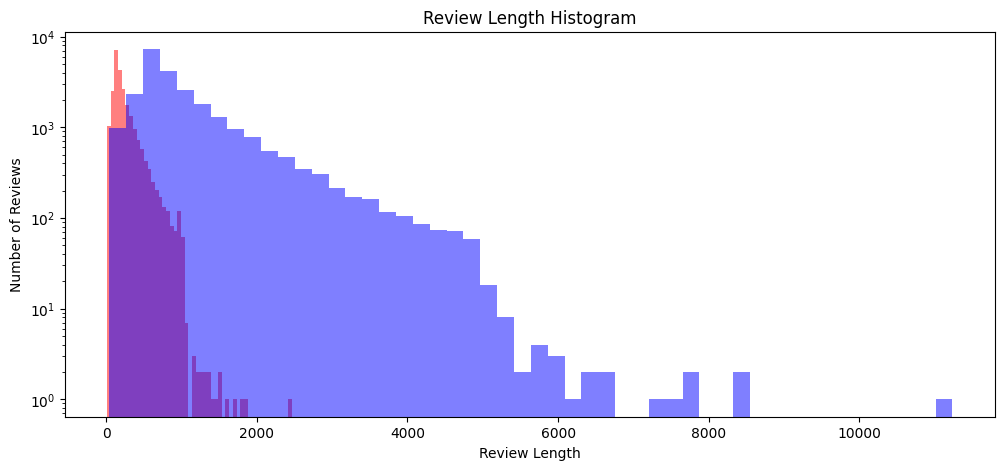

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(review_len_by_words, bins=50, alpha=0.5, color='r')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [14]:
import numpy as np
print('가장 많은 단어를 가진 문장의 단어 개수: ', np.max(review_len_by_words))
print('가장 적은 단어를 가진 문장의 단어 개수: ', np.min(review_len_by_words))
print('문장당 단어 개수 평균: ', np.mean(review_len_by_words))
print('문장당 단어 개수 중간값: ', np.median(review_len_by_words))
print('문장당 단어 개수 표준편차: ', np.std(review_len_by_words))
print('문장의 하위 10% 길이: ', np.percentile(review_len_by_words, 10))
print('문장의 상위 10% 길이: ', np.percentile(review_len_by_words, 100-10))

가장 많은 단어를 가진 문장의 단어 개수:  2470
가장 적은 단어를 가진 문장의 단어 개수:  10
문장당 단어 개수 평균:  233.7872
문장당 단어 개수 중간값:  174.0
문장당 단어 개수 표준편차:  173.72955740506563
문장의 하위 10% 길이:  91.0
문장의 상위 10% 길이:  458.0
